In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from collections import defaultdict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
content_df = pd.read_csv('/content/drive/MyDrive/content.csv')  # Replace with the path to your content.csv
graph_df = pd.read_csv('/content/drive/MyDrive/graph.csv')     # Replace with the path to your graph.csv

In [ ]:
# Create a directed graph from graph.csv
print(graph_df.columns)
G = nx.DiGraph()
for _, row in graph_df.iterrows():
    G.add_edge(row['Source'], row['Target'])

Index(['Source', 'Target'], dtype='object')


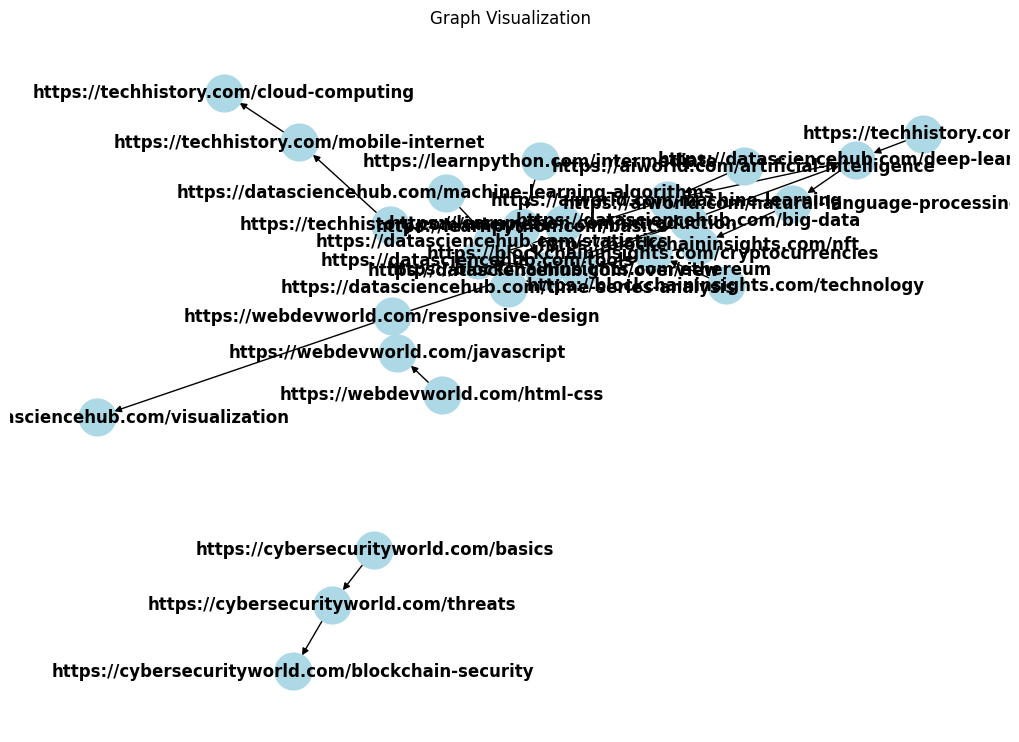

In [ ]:
# Store content as a dictionary
content_dict = {row['URL']: row['Content'] for _, row in content_df.iterrows()}  # Adjust 'URL' and 'Content'

# Task 02: Visualize the Graph
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
plt.title("Graph Visualization")
plt.show()

In [ ]:
# Task 03 (Bonus): Tokenize and Clean Content
# Download NLTK stopwords (run this once)
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.data.path = ['/root/nltk_data']  # Ensure the path for nltk data
nltk.download('punkt', force=True)  # Force re-download of the punkt resource
nltk.data.path.append('/usr/local/share/nltk_data')
from nltk.tokenize import word_tokenize
print(word_tokenize("Testing nltk punkt tokenizer."))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/local/share/nltk_data'
**********************************************************************


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
import nltk
nltk.download('punkt')  # Download the punkt tokenizer

# Tokenize and clean the content
cleaned_content = {}
for doc_id, content in content_dict.items():
    tokens = word_tokenize(content.lower())  # Convert to lowercase and tokenize
    tokens = [re.sub(r'\W+', '', token) for token in tokens]  # Remove punctuation
    tokens = [token for token in tokens if token not in stop_words and token]  # Remove stopwords
    cleaned_content[doc_id] = tokens


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# Task 04: Build an Inverted Index
inverted_index = defaultdict(list)
for doc_id, tokens in cleaned_content.items():
    for token in set(tokens):  # Use `set` to avoid duplicate entries
        inverted_index[token].append(doc_id)

In [ ]:
# Task 05: Single-Word Query with PageRank
# Calculate PageRank scores
pagerank_scores = nx.pagerank(G)

def single_word_search(query):
    query = query.lower()
    results = inverted_index.get(query, [])
    # Sort results by PageRank
    sorted_results = sorted(results, key=lambda x: pagerank_scores.get(x, 0), reverse=True)
    return sorted_results

In [ ]:
# Example query
query = "hello"
results = single_word_search(query)
print(f"Search results for '{query}': {results}")

Search results for 'hello': []


In [ ]:
# Task 06 (Bonus): Bag-of-Words Query Search
def bag_of_words_search(query):
    query_tokens = word_tokenize(query.lower())
    query_tokens = [re.sub(r'\W+', '', token) for token in query_tokens if token not in stop_words]
    results = set()
    for token in query_tokens:
        results.update(inverted_index.get(token, []))
    # Rank by cumulative PageRank
    sorted_results = sorted(results, key=lambda x: sum(pagerank_scores.get(doc, 0) for doc in results), reverse=True)
    return sorted_results

# Example query
query = "example search engine"
results = bag_of_words_search(query)
print(f"Bag-of-words search results for '{query}': {results}")

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/local/share/nltk_data'
**********************************************************************
